<IPython.core.display.Javascript object>


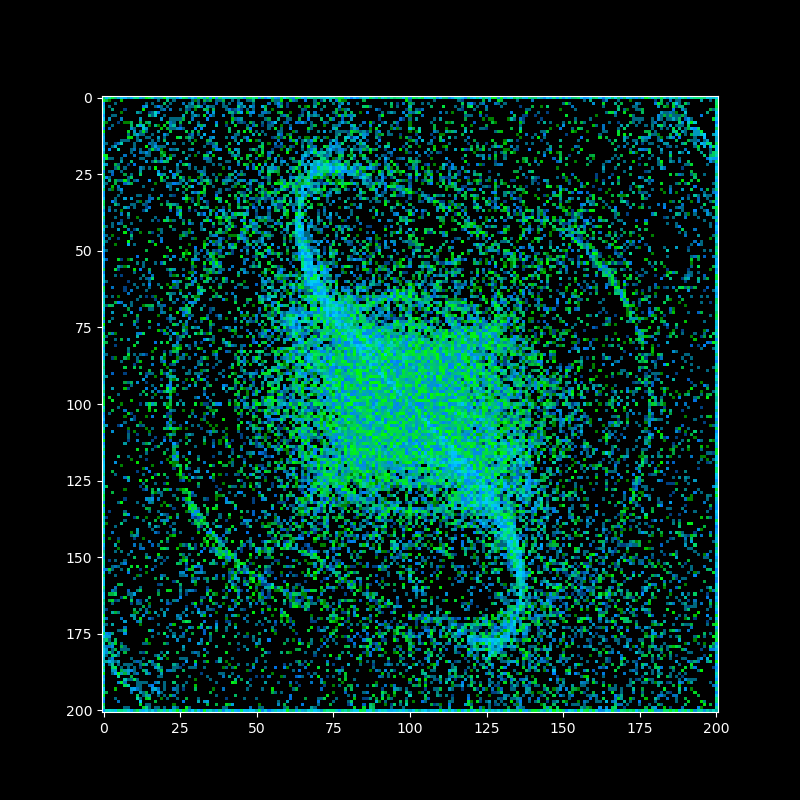

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total runtime: 21.05052599999908


In [79]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import random
from random import seed
from random import randint

plt.style.use('dark_background')

start = time.perf_counter()

class DefinePoint(object):
    def __init__(self, x, y, c=[0,0,0]):
        self.x = x
        self.y = y
        self.c = c
        self.r = ((self.x **2)+(self.y **2)) **.5
        self.r2 = ((self.x **2)+(self.y **2))

#     def calcR(self):
#         self.r = ((self.x **2)+(self.y **2)) **.5
        
    def pickFunc(self):
        seed()
        ran = randint(1,3)
        if ran == 1:
            self.x = self.x / self.r2
            self.y = self.y / self.r2
            self.c = [0,0.5,1]
        elif ran == 2:
            self.x = self.x / self.r2
            self.y = self.y / self.r2
            self.c = [0,1,0]
        elif ran == 3:
            self.x = self.x *np.sin(self.r2) - self.y *np.cos(self.r2)
            self.y = self.x *np.cos(self.r2) + self.y *np.sin(self.r2)
            self.c = [0,0.8,1]
        return self.x, self.y, self.c


class MakeFire:
    def __init__(self, numPoints):
        fig = plt.figure(figsize = (8,8))
        self.ax = fig.add_subplot()
        
        self.numPoints = numPoints
        self.colArr = np.zeros((201,201,3))
        self.binArr = np.zeros((201,201,1))
        self.xVal = random.uniform(0,1)
        self.yVal = random.uniform(-1,1)
        self.xBin = int(self.xVal *20)
        self.yBin = int(self.yVal *20)
        self.col = [0,0,0]
    
    def addToCol(self):
        self.colArr[self.xBin][self.yBin] = (self.colArr[self.xBin][self.yBin] + self.col) /2
        
    def addToBin(self):
        self.binArr[self.xBin][self.yBin] += 1
        
    def newPoint(self):
        pointObj = DefinePoint(self.xVal,self.yVal)
        self.xVal, self.yVal, self.col = pointObj.pickFunc()
        self.xBin = max(min(int(self.xVal *100),100) +100,0)
        self.yBin = max(min(int(self.yVal *100),100) +100,0)

        self.addToCol()
        self.addToBin()

    def addPoints(self):
        for i in range(self.numPoints):
            self.newPoint()
    
    def showFire(self):
        self.addPoints()
        totArr = np.dstack((self.colArr,self.binArr))
        self.ax.imshow(totArr)
        plt.show()
        
simulation = MakeFire(1000000)
simulation.showFire()

end = time.perf_counter()

print("Total runtime:", (end - start))

<IPython.core.display.Javascript object>


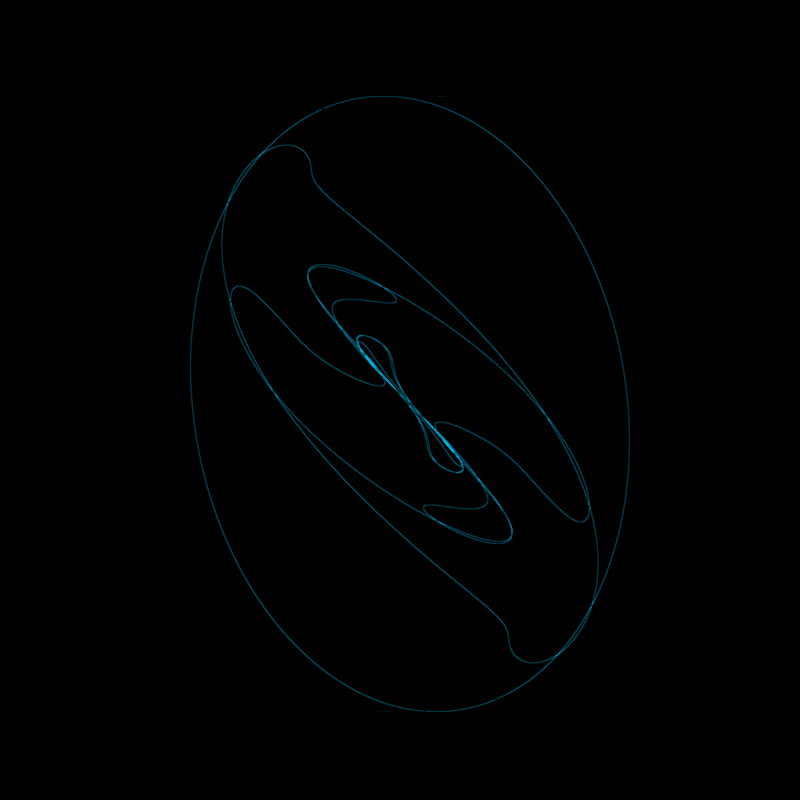

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total runtime: 140.89755049999803


In [75]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import numpy as np
import random
from random import seed
from random import randint
from random import shuffle

plt.style.use('dark_background')

start = time.perf_counter()

# class DefinePoint(object):
#     def __init__(self, x, y, c=[0,0,0]):
#         self.x = x
#         self.y = y
#         self.c = c
#         self.r = ((self.x **2)+(self.y **2)) **.5
#         self.r2 = ((self.x **2)+(self.y **2))
        
#     def pickFunc(self):
#         seed()
#         ran = randint(1,3)
#         if ran == 1:
#             self.x = self.x / self.r
#             self.y = self.y / self.r
#             self.c = [1,0,0]
#         elif ran == 2:
#             self.x = self.x / self.r2
#             self.y = self.y / self.r2
#             self.c = [0,1,0]
#         elif ran == 3:
#             self.x = self.x *np.sin(self.r2) - self.y *np.cos(self.r2)
#             self.y = self.x *np.cos(self.r2) + self.y *np.sin(self.r2)
#             self.c = [0,0.5,1]
#         return self.x, self.y, self.c


class MakeFire:
    def __init__(self, numPoints, bins):
        fig = plt.figure(figsize = (8,8))
        self.ax = fig.add_subplot(111)
#         self.ax2 = fig.add_subplot(211)
#         self.ax3 = fig.add_subplot(212)
        plt.axis('off')
        
        self.bins = bins
        self.numPoints = numPoints - (numPoints %2)
        self.ranLst = [1,2] *(self.numPoints //2)
        self.colArr = np.zeros((self.bins +1,self.bins +1,3))
        self.binArr = np.zeros((self.bins +1,self.bins +1,1))
        self.xVal = random.uniform(0,1)
        self.yVal = random.uniform(0,1)
        self.xBin = int(self.xVal *100)
        self.yBin = int(self.yVal *100)
        self.col = [0,0,0]
        self.r = ((self.xVal **2)+(self.yVal **2)) **.5
        self.r2 = ((self.xVal **2)+(self.yVal **2))
        shuffle(self.ranLst)
    
    def calcR(self):
        self.r = ((self.xVal **2)+(self.yVal **2)) **.5
        self.r2 = ((self.xVal **2)+(self.yVal **2))
        
    def pickFunc(self, i):
#         self.calcR()
        ran = self.ranLst[i]
        self.r2 = ((self.xVal **2)+(self.yVal **2))
        self.r = ((self.xVal **2)+(self.yVal **2)) **.5
        if ran == 1:
            self.xVal = self.xVal / self.r
            self.yVal = self.yVal / self.r
            self.col = [0,0,0]
        elif ran == 2:
            self.xVal = self.xVal *np.sin(self.r2) - self.yVal *np.cos(self.r2)
            self.yVal = self.xVal *np.cos(self.r2) + self.yVal *np.sin(self.r2)
            self.col = [0,0.8,1]
    
    def addToCol(self):
        self.colArr[self.xBin][self.yBin] = (self.colArr[self.xBin][self.yBin] + self.col) /2
        
    def addToBin(self):
        self.binArr[self.xBin][self.yBin] += 1
        
    def newPoint(self, i):
#         pointObj = DefinePoint(self.xVal,self.yVal)
        self.pickFunc(i)
        self.xBin = max(min(int(self.xVal *(self.bins //2)),self.bins //2) +(self.bins //2),0)
        self.yBin = max(min(int(self.yVal *(self.bins //2)),self.bins //2) +(self.bins //2),0)

        self.addToCol()
        self.addToBin()

    def addPoints(self):
        for i in range(self.numPoints):
            self.newPoint(i)
    
    def showFire(self):
        self.addPoints()
        totArr = np.dstack((self.colArr,self.binArr))
        totArr2 = np.roll(totArr,1,axis = 0)
        totArr3 = np.roll(totArr,1,axis = 1)
        totArr4 = np.roll(totArr,-1,axis = 0)
        totArr5 = np.roll(totArr,-1,axis = 1)
        totArr22 = np.roll(totArr,2,axis = 0)
        totArr32 = np.roll(totArr,2,axis = 1)
        totArr42 = np.roll(totArr,-2,axis = 0)
        totArr52 = np.roll(totArr,-2,axis = 1)
        self.ax.imshow(totArr)
        self.ax.imshow(totArr2)
        self.ax.imshow(totArr3)
        self.ax.imshow(totArr4)
        self.ax.imshow(totArr5)
        self.ax.imshow(totArr22)
        self.ax.imshow(totArr32)
        self.ax.imshow(totArr42)
        self.ax.imshow(totArr52)
#         self.ax2.imshow(totArr, interpolation='hanning')
#         self.ax3.imshow(totArr, interpolation='quadric')
#         plt.savefig('flame3.png', dpi = 400, bbox_inches='tight', pad_inches=.1)
        plt.show()

# def genRandSeq(numTerms):
#     each = numTerms //5
#     lst = [1, 2, 3, 4, 5] * each
#     shuffle(lst)
#     return lst

# %timeit genRandSeq(100000)
# %timeit ran = randint(1,5)
simulation = MakeFire(10000000,2000)
simulation.showFire()

end = time.perf_counter()

print("Total runtime:", (end - start))

<IPython.core.display.Javascript object>


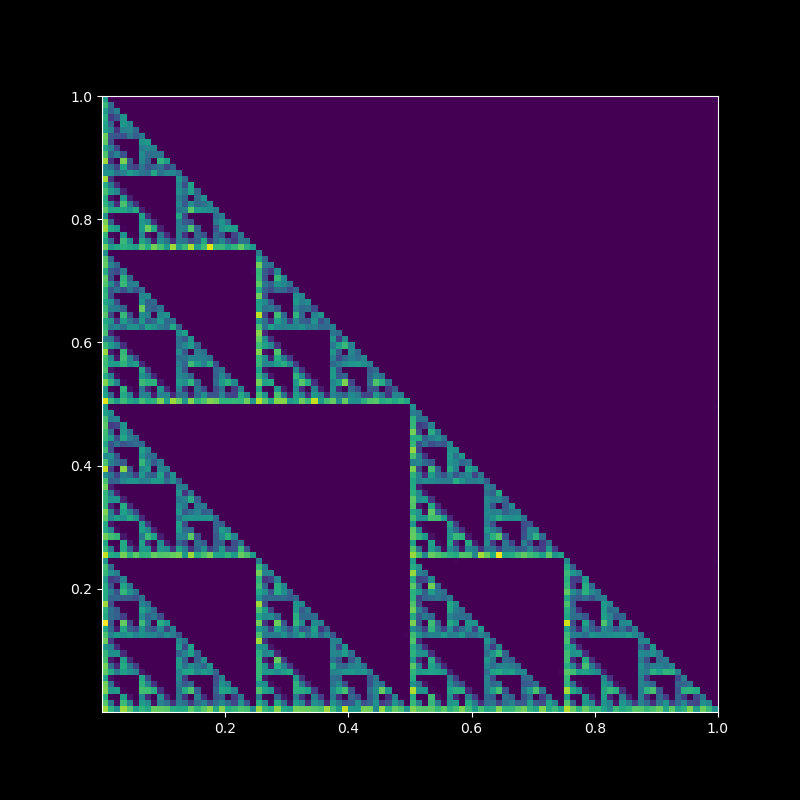

Total runtime: 0.7990198999999993


In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import matplotlib.animation as animation
import numpy as np
from matplotlib.pyplot import figure

from random import seed
from random import random
from random import randint

plt.style.use('dark_background')

start = time.perf_counter()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

def F0(x,y):
    return [x/2,y/2]

def F1(x,y):
    x1 = (x +1) /2
    y1 = y /2
    return [x1,y1]

def F2(x,y):
    x1 = x /2
    y1 = (y +1) / 2
    return [x1,y1]

# col = (0.9,0.2,0.5)
lstX = [1]
lstY = [1]

for k in range(100000):
    seed()
    
    ran = randint(1,3)
    if ran == 1:
        xY = F0(lstX[k],lstY[k])
        lstX.append(xY[0])
        lstY.append(xY[1])
    elif ran == 2:
        xY = F1(lstX[k],lstY[k])
        lstX.append(xY[0])
        lstY.append(xY[1])
    elif ran == 3:
        xY = F2(lstX[k],lstY[k])
        lstX.append(xY[0])
        lstY.append(xY[1])

ax.set_aspect('equal', adjustable ='box')
# ax.scatter(lstX,lstY,color = 'white', s = .1)
ax.hist2d(lstX,lstY, bins = 100)
plt.show()

end = time.perf_counter()

print("Total runtime:", (end - start))